In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.cluster import MeanShift

import joblib

In [2]:
data = pd.read_csv("credit-card-data.csv")

In [3]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
data.shape

(8950, 18)

# Checking the data type of all the features and transform it if needed.

In [7]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

#### As above, everything is in int or float type excep "CUST_ID" as it is in object type. But, we do not need to transform it as we do not need it in our model as well, so we can just drop that column

# Dropping columns which are not needed.

In [8]:
data = data.drop('CUST_ID', axis = 1)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Checking if there is any null value present in any of the feature in the dataset

In [9]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
print("Count of every Features:\n", data.count())
print("\nPercentage of null values in every feature:\n", data.apply(lambda x: sum(x.isnull()/len(data))*100))

Count of every Features:
 BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

Percentage of null values in every feature:
 BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.

#### As above, there are some missing values present in "CREDIT_LIMIT" & "MINIMUM_PAYMENT" 
#### The percentage of all the null values is less than 5% so we can easily fill the null values.
# In order to impute missing value, first we will have to check which method should we use:

In [11]:
df = data.copy()

In [12]:
#just checking any random value in the data of the feature and finalizing which method will be the best for imputing values
actualValue = df['CREDIT_LIMIT'][3]
actualValue

7500.0

## 1. Mean Imputing Method

In [13]:
df['CREDIT_LIMIT'][3] = np.NAN
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
meanValue = df['CREDIT_LIMIT'][3]
meanValue

<ipython-input-13-c7f1f4963e88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CREDIT_LIMIT'][3] = np.NAN


4494.113559601363

## 2. Median Imputing Method

In [14]:
df['CREDIT_LIMIT'][3] = np.NAN
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())
medianValue = df['CREDIT_LIMIT'][3]
medianValue

<ipython-input-14-88cb4b9fe6ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CREDIT_LIMIT'][3] = np.NAN


3000.0

# As above, the closest imputed value is of MEAN method, so we can use mean imputing method to impute missing values in our dataset:

In [15]:
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())

In [16]:
print("Count of every Features:\n", data.count(),"\n")
print("Null Values:\n",data.isnull().sum())

Count of every Features:
 BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64 

Null Values:
 BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY 

#### As above, all the missing values are imputed now. There is no null value in the dataset anymore.

# Visualization

### 1. Visualizing every feature(distplot):

C:\Users\jaspr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaspr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaspr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

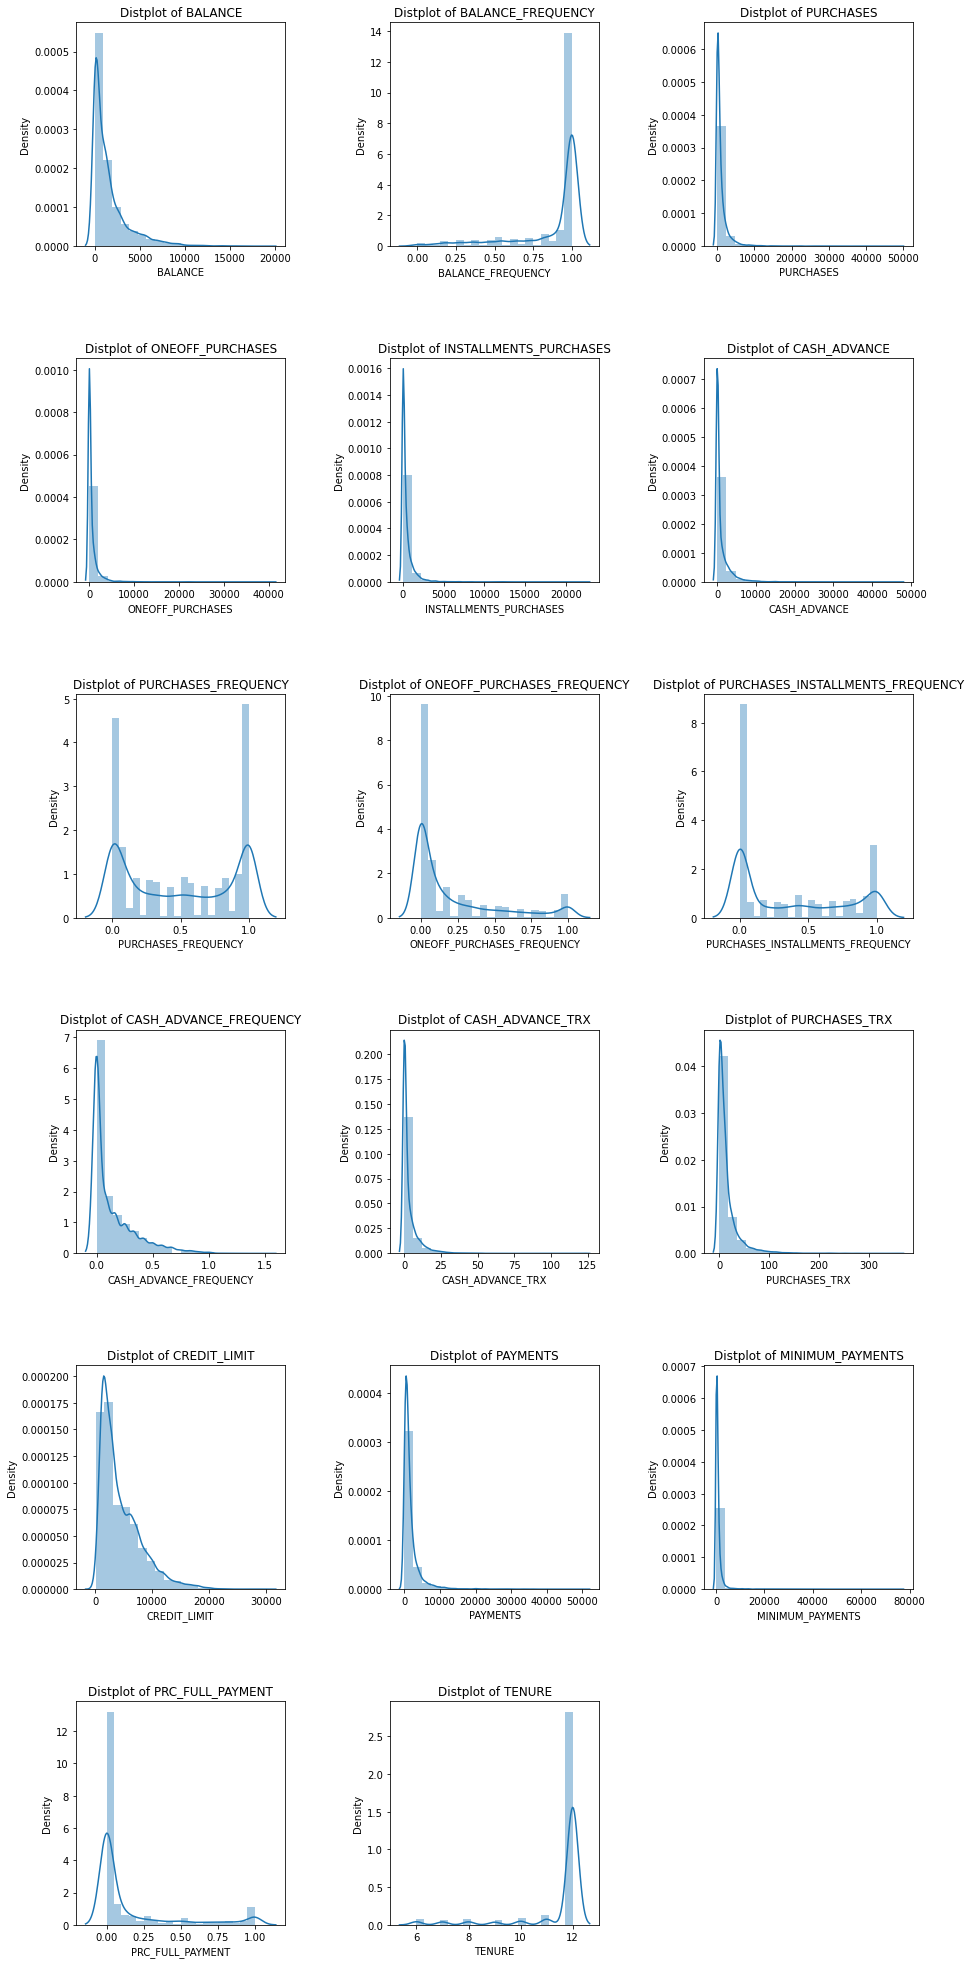

In [17]:
plt.figure(1, figsize = (15,35))
n = 0
for x in data.columns:
    n +=1
    plt.subplot(6, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(data[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### 2. Count Plot for one of the feature(Tenure):

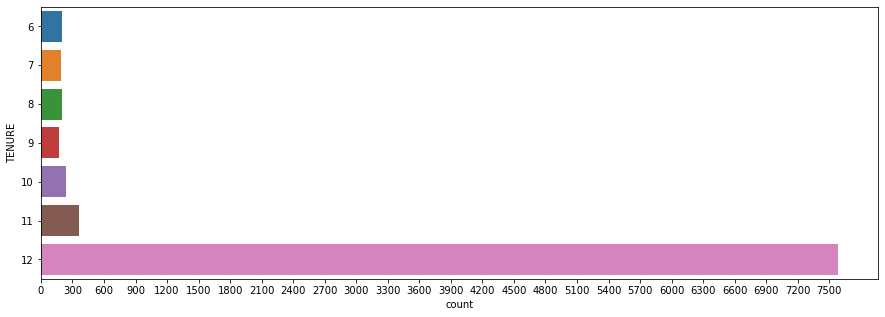

In [18]:
plt.figure(figsize = (15,5))
sns.countplot(y = 'TENURE', data = data)
plt.xticks(np.arange(0, 7800, step=300))
plt.show()

# Feature Scaling

### We need to normalise the data before aplying any algorithm because some features are in between 0-1 and some are very large like in thousands: This can cause false prediction as k-means algorithm works with distance.          So, normalising all the features:

In [19]:
cols = data.values
min_max_scaler = preprocessing.MinMaxScaler()
cols_scaled = min_max_scaler.fit_transform(cols)
normalizeData = pd.DataFrame(cols_scaled, columns = data.columns)
normalizeData

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0
8946,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011310,0.000000,0.0
8947,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0
8948,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0


### As above, now all the fatures in the dataset are normalized.

# Checking how many clusters we should use by ELBOW METHOD:

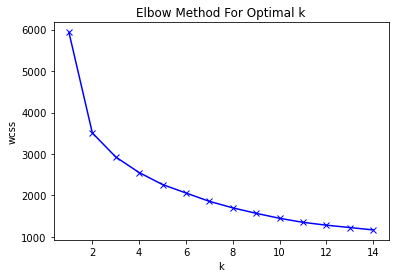

In [20]:
#WCSS -  Within-Cluster Sum of Square
wcss = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(normalizeData)
    wcss.append(km.inertia_)
plt.plot(range(1,15), wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('Elbow Method For Optimal k')
plt.show()

## As above, it looks like the number of optimal clusters are 7. So, k = 7

# Training

In [21]:
#np.random.seed(0)
msk = np.random.rand(len(normalizeData)) < 0.8
train = normalizeData[msk]
test = normalizeData[~msk]

# 1. k-means Clustering Algorithm

### Calling k-means fit method using clusters 7: and using the trained model, we will predict the clusters in the Test data:

In [22]:
def km():
    #SAVING THE MODEL BECAUSE WE DO NOT NEED TO TRAIN THE MODEL AGAIN & AGAIN. SO, AFTER TRAINING SAVE THE MODEL.
    #TRAINING & PREDICTING
    #kmeans = KMeans(n_clusters = 7, random_state = 0)
    #kmeans.fit(train)

    #joblib.dump(kmeans, 'km.pkl')
    km_model = joblib.load('km.pkl')
    km_predictions = km_model.predict(test)
    
    #Assigning prediction as a new column in the dataset:
    kmResult = test.copy()
    kmResult['PREDICTED_CLUSTER'] = km_predictions
    return kmResult

km_predictions = km()

In [23]:
km_predictions

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PREDICTED_CLUSTER
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,0.005587,0.031720,0.003979,0.001826,0.0,1.000000,1
18,0.104451,1.000000,0.010285,0.004072,0.015038,0.000000,0.666667,0.083333,0.583333,0.000000,0.000000,0.025140,0.432387,0.033927,0.009745,0.0,1.000000,5
21,0.334479,1.000000,0.129690,0.144992,0.019996,0.004859,1.000000,0.916667,1.000000,0.222222,0.048780,0.256983,0.373957,0.040968,0.021723,0.0,1.000000,0
24,0.281916,1.000000,0.000000,0.000000,0.000000,0.016949,0.000000,0.000000,0.000000,0.242424,0.032520,0.000000,0.198664,0.028050,0.021687,0.0,0.833333,1
28,0.375614,1.000000,0.007893,0.005018,0.008111,0.047439,0.666667,0.166667,0.416667,0.555555,0.130081,0.022346,0.348915,0.031573,0.021580,0.0,1.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914,0.009552,0.500000,0.000000,0.000000,0.000000,0.039569,0.000000,0.000000,0.000000,0.333333,0.081301,0.000000,0.065109,0.090008,0.001152,1.0,0.000000,6
8918,0.000593,0.666667,0.003161,0.000000,0.006889,0.000000,0.666667,0.000000,0.500000,0.000000,0.000000,0.011173,0.031720,0.002949,0.000567,0.5,0.000000,6
8920,0.055405,0.666667,0.000000,0.000000,0.000000,0.038613,0.000000,0.000000,0.000000,0.222222,0.016260,0.000000,0.065109,0.001080,0.003052,0.0,0.000000,6
8929,0.019510,0.333333,0.000000,0.000000,0.000000,0.031088,0.000000,0.000000,0.000000,0.111111,0.040650,0.000000,0.048414,0.000000,0.011310,0.0,0.000000,6


### Using groupby function to understand/analyze the model better:

In [24]:
output = km_predictions.groupby(by='PREDICTED_CLUSTER').mean()
output = output[normalizeData.columns]

#saving the mean values in csv and reading it again:
output.to_csv('output.csv')
out = pd.read_csv('output.csv')
out

,PREDICTED_CLUSTER,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,0.131921,0.986512,0.090183,0.073409,0.063567,0.031439,0.980254,0.801136,0.866207,0.099379,0.038647,0.172314,0.262019,0.094296,0.012813,0.242220,0.977053
1,1,0.119966,0.972440,0.004783,0.004771,0.001782,0.034006,0.111531,0.064602,0.047181,0.144385,0.044034,0.005984,0.140067,0.031217,0.014986,0.023056,0.981540
2,2,0.007019,0.905039,0.021451,0.005680,0.036472,0.001803,0.862365,0.073753,0.806050,0.004850,0.001355,0.047109,0.123301,0.025563,0.002578,0.801300,0.879630
3,3,0.067982,0.959695,0.033863,0.036475,0.007725,0.012183,0.787282,0.739390,0.136734,0.059780,0.017682,0.057917,0.187708,0.038405,0.007547,0.223827,0.980186
4,4,0.008508,0.374312,0.007673,0.007142,0.003784,0.009716,0.190301,0.083471,0.104494,0.028427,0.007420,0.009790,0.131843,0.025257,0.003536,0.250127,0.970065
5,5,0.079187,0.938109,0.021857,0.007133,0.034793,0.014619,0.863298,0.103871,0.810628,0.067624,0.020295,0.062342,0.132806,0.029128,0.014053,0.058069,0.956379
6,6,0.068427,0.770558,0.005238,0.004636,0.003019,0.043479,0.187592,0.075911,0.101062,0.182589,0.044414,0.006078,0.106566,0.019250,0.005592,0.076962,0.206790


# Visualizing after prediction:

### Count Plot- Analyzing Clusters: (which cluster carrying how many values from the test data)

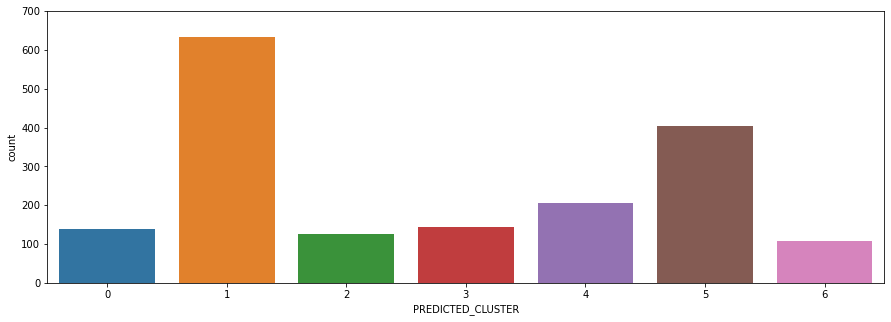

In [25]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'PREDICTED_CLUSTER', data = km_predictions)
plt.yticks(np.arange(0, 800, step = 100))
plt.show()

# RelPlot:

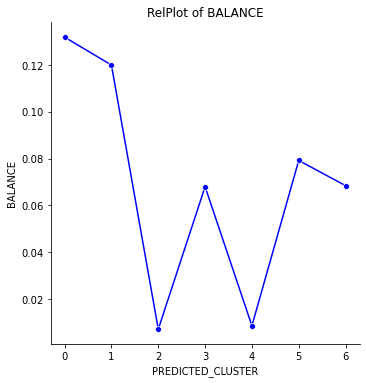

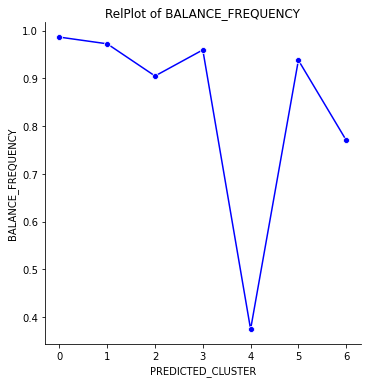

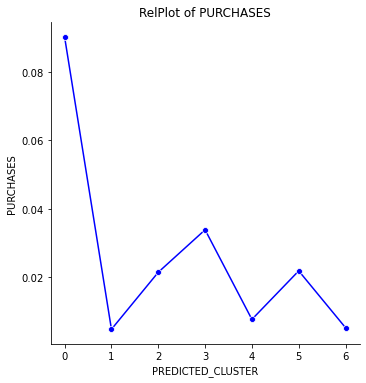

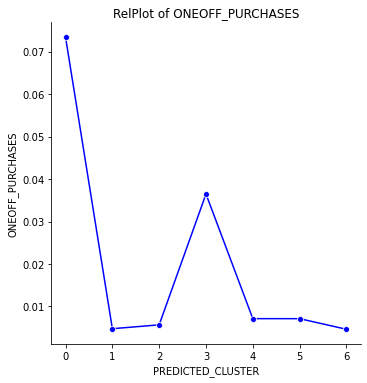

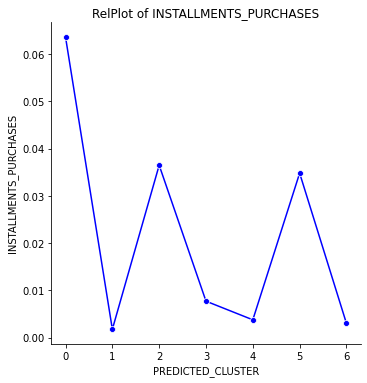

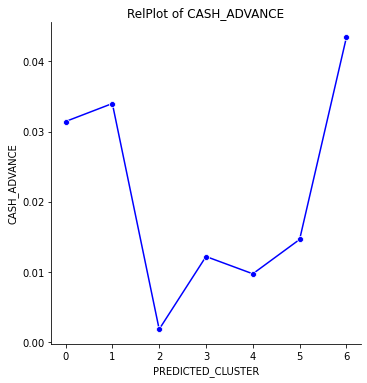

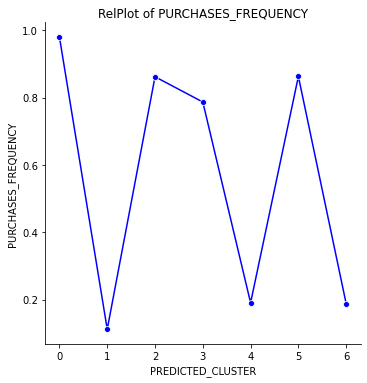

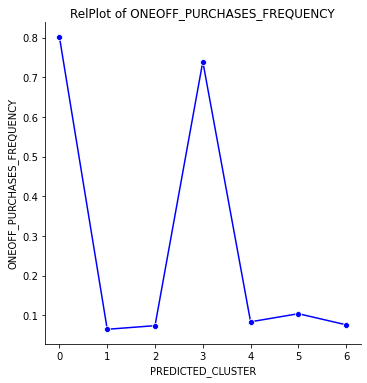

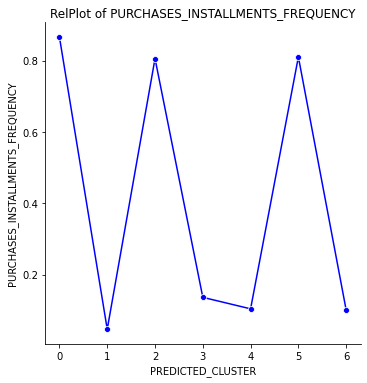

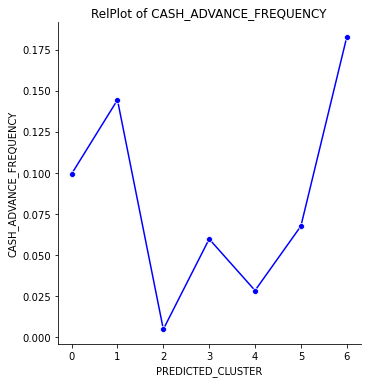

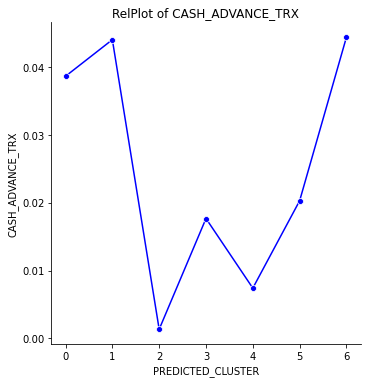

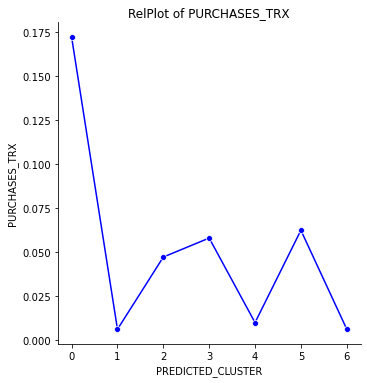

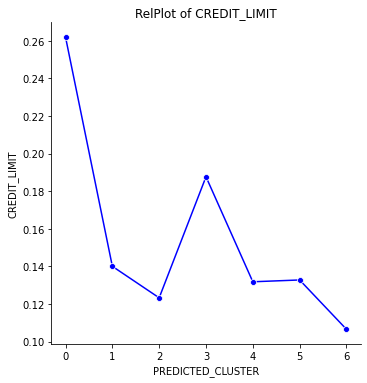

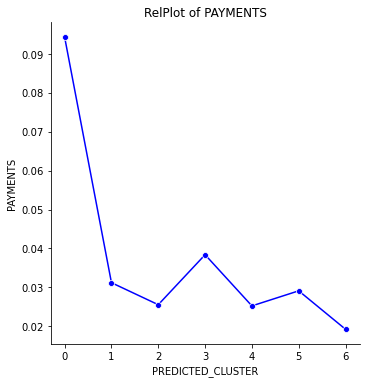

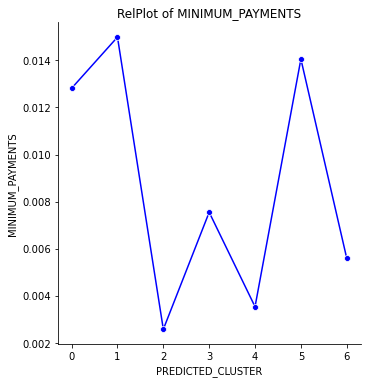

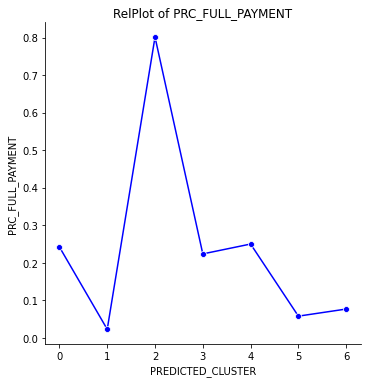

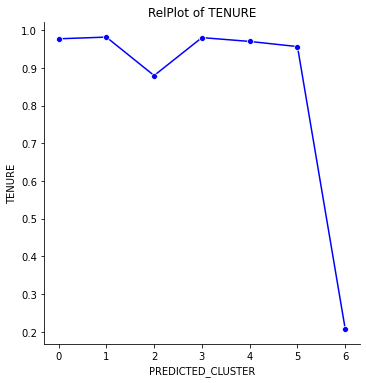

In [26]:
for i in out.columns[1:]:
    sns.relplot(x = 'PREDICTED_CLUSTER', y = i, data = out, kind = 'line', marker = 'o', color = 'blue')
    plt.title('RelPlot of {}'.format(i))
plt.show()

# 2. Mean Shift Algorithm

In [27]:
def MS():
    #ms = MeanShift()
    #ms.fit(train)
    
    #joblib.dump(ms, 'ms.pkl')
    ms_model = joblib.load('ms.pkl')
    ms_predictions = ms_model.predict(test)
    
    msResult = test.copy()
    msResult['PREDICTED_CLUSTER'] = ms_predictions
    return msResult

ms_predictions = MS()

In [28]:
ms_predictions

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PREDICTED_CLUSTER
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,0.005587,0.031720,0.003979,0.001826,0.0,1.000000,0
18,0.104451,1.000000,0.010285,0.004072,0.015038,0.000000,0.666667,0.083333,0.583333,0.000000,0.000000,0.025140,0.432387,0.033927,0.009745,0.0,1.000000,1
21,0.334479,1.000000,0.129690,0.144992,0.019996,0.004859,1.000000,0.916667,1.000000,0.222222,0.048780,0.256983,0.373957,0.040968,0.021723,0.0,1.000000,1
24,0.281916,1.000000,0.000000,0.000000,0.000000,0.016949,0.000000,0.000000,0.000000,0.242424,0.032520,0.000000,0.198664,0.028050,0.021687,0.0,0.833333,0
28,0.375614,1.000000,0.007893,0.005018,0.008111,0.047439,0.666667,0.166667,0.416667,0.555555,0.130081,0.022346,0.348915,0.031573,0.021580,0.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914,0.009552,0.500000,0.000000,0.000000,0.000000,0.039569,0.000000,0.000000,0.000000,0.333333,0.081301,0.000000,0.065109,0.090008,0.001152,1.0,0.000000,0
8918,0.000593,0.666667,0.003161,0.000000,0.006889,0.000000,0.666667,0.000000,0.500000,0.000000,0.000000,0.011173,0.031720,0.002949,0.000567,0.5,0.000000,1
8920,0.055405,0.666667,0.000000,0.000000,0.000000,0.038613,0.000000,0.000000,0.000000,0.222222,0.016260,0.000000,0.065109,0.001080,0.003052,0.0,0.000000,0
8929,0.019510,0.333333,0.000000,0.000000,0.000000,0.031088,0.000000,0.000000,0.000000,0.111111,0.040650,0.000000,0.048414,0.000000,0.011310,0.0,0.000000,0


### Using groupby function to understand/analyze the model better:

In [29]:
output = ms_predictions.groupby(by='PREDICTED_CLUSTER').mean()
output = output[normalizeData.columns]
output

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
PREDICTED_CLUSTER,,,,,,,,,,,,,,,,,
0,0.089026,0.827272,0.006528,0.006716,0.002062,0.028403,0.146786,0.093953,0.053196,0.121325,0.035098,0.008119,0.135187,0.028377,0.011232,0.082968,0.906045
1,0.074119,0.937492,0.032710,0.019527,0.035959,0.014562,0.877601,0.300777,0.736633,0.061684,0.019826,0.076398,0.158528,0.038273,0.011077,0.226237,0.934143
2,0.235428,1.000000,0.586395,0.653044,0.095008,0.000000,1.000000,1.000000,0.708333,0.000000,0.000000,0.601955,0.440735,0.485395,0.017886,0.375000,1.000000
4,0.431530,0.969697,0.030746,0.013608,0.042358,0.538543,0.222222,0.166667,0.194444,0.572390,0.341463,0.030726,0.382304,0.455858,0.036937,0.225589,0.944444
5,0.034428,0.984849,0.144652,0.140151,0.061374,0.000960,0.916667,0.916667,0.305556,0.009259,0.001355,0.137803,0.510295,0.147139,0.003270,0.986111,1.000000


# Visualizing after prediction:

### Analyzing Clusters: (which cluster carrying how many values from the test data)

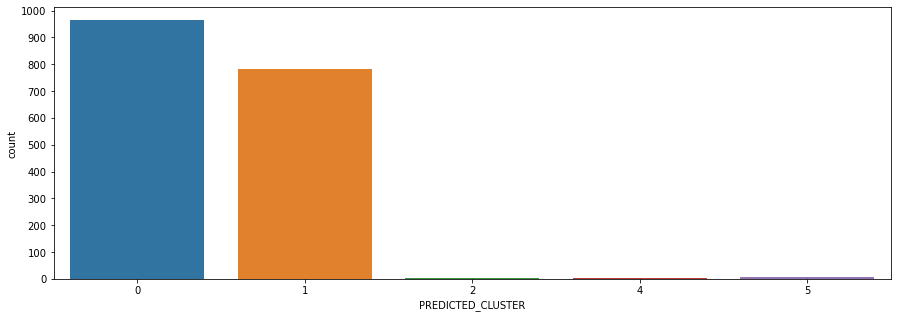

In [30]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'PREDICTED_CLUSTER', data = ms_predictions)
plt.yticks(np.arange(0, 1100, step = 100))
plt.show()

# The 'k-means clustering algorithm' is fast and working better than 'Mean Shift Algorithm' as the data is also not well divided between the clusters.

# For user input:

In [176]:
%run userPrediction.ipynb

There are total of 17 features. Please fill in the values:
Enter value for 'BALANCE': 3202.467416
Enter value for 'BALANCE_FREQUENCY': 0.909091
Enter value for 'PURCHASES': 0.00
Enter value for 'ONEOFF_PURCHASES': 0.00
Enter value for 'INSTALLMENTS_PURCHASES': 0
Enter value for 'CASH_ADVANCE': 6442.945483
Enter value for 'PURCHASES_FREQUENCY': 0
Enter value for 'ONEOFF_PURCHASES_FREQUENCY': 0
Enter value for 'PURCHASES_INSTALLMENTS_FREQUENCY': 0
Enter value for 'CASH_ADVANCE_FREQUENCY': 0.250000
Enter value for 'CASH_ADVANCE_TRX': 4
Enter value for 'PURCHASES_TRX': 0
Enter value for 'CREDIT_LIMIT': 7000.0
Enter value for 'PAYMENTS': 4103.032597
Enter value for 'MINIMUM_PAYMENTS': 1072.340217
Enter value for 'PRC_FULL_PAYMENT': 0.222222
Enter value for 'TENURE': 12
The values entered by you are lying in Cluster: 3
